In [ ]:
##### Nabila Sahli 

In [9]:
#### Fragen :

#1_Lineares Ausgangsverhalten:

#Verringern Sie die Anzahl der versteckten Neuronen. 
#Weniger Neuronen können zu einer linearen Approximation der Funktion führen, da das Modell weniger komplexe Muster erfassen kann.
#Verringern Sie die Lernrate. Eine niedrigere Lernrate kann dazu führen, dass das Modell langsamere und kleinere Anpassungen vornimmt, was zu einem linearen Verhalten führen kann.


#2_Overfitting:

#Erhöhen Sie die Anzahl der versteckten Neuronen. 
#Ein Modell mit einer großen Anzahl von Neuronen kann zu einer Überanpassung an die Trainingsdaten führen, indem es sich zu stark an die Rauschpunkte in den Daten anpasst.
#Erhöhen Sie die Lernrate. Eine zu hohe Lernrate kann zu schnellen und großen Anpassungen führen, die dazu führen können, dass das Modell die Trainingsdaten übermäßig gut passt, aber Schwierigkeiten hat, auf neuen Daten zu generalisieren.

C:\Users\nabil\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([3918])) that is different to the input size (torch.Size([3918, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 100/1000, Loss: 10.740633964538574
Epoch 200/1000, Loss: 3.130594253540039
Epoch 300/1000, Loss: 2.380467176437378
Epoch 400/1000, Loss: 2.029115915298462
Epoch 500/1000, Loss: 1.7720600366592407
Epoch 600/1000, Loss: 1.556220531463623
Epoch 700/1000, Loss: 1.3707767724990845
Epoch 800/1000, Loss: 1.2171381711959839
Epoch 900/1000, Loss: 1.092516541481018
Epoch 1000/1000, Loss: 0.9981252551078796
Test Loss: 1.113539457321167


C:\Users\nabil\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([980])) that is different to the input size (torch.Size([980, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


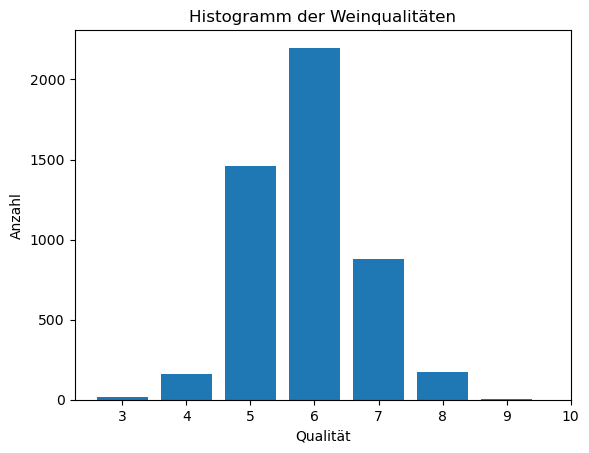

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Daten laden
data = pd.read_csv("winequality-white.csv", delimiter=";")

# Eingabevariablen auswählen
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
            "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
            "pH", "sulphates", "alcohol"]

# Zielvariable auswählen
target = "quality"

# Daten aufteilen in Eingabevariablen X und Zielvariablen y
X = data[features]
y = data[target]

# Daten normalisieren
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konvertieren der Daten in Tensoren
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# Definition des neuronalen Netzwerks
class WineQualityNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WineQualityNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameter festlegen
input_size = len(features)
output_size = 1
hidden_size = 64
learning_rate = 0.001
num_epochs = 1000

# Modellinitialisierung
model = WineQualityNet(input_size, hidden_size, output_size)

# Loss-Funktion und Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Trainingsschleife
for epoch in range(num_epochs):
    # Vorwärtsdurchlauf und Vorhersage
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Rückwärtsdurchlauf und Optimierung
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Ausgabe des Fortschritts alle 100 Epochen
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluation des Modells auf Testdaten
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item()}")
    
    
    
##### Die Trainingsdauer eines neuronalen Netzwerks kann von verschiedenen Faktoren abhängen. Hier sind einige wichtige Faktoren, die die Trainingsdauer beeinflussen können:
#Datensatzgröße: Je größer der Datensatz ist, desto länger dauert das Training. Mehr Daten bedeuten in der Regel auch längere Berechnungszeiten.
   
#Netzwerkarchitektur: Die Komplexität der Netzwerkarchitektur kann die Trainingsdauer beeinflussen. Tiefere Netzwerke mit mehr Schichten und mehr Neuronen benötigen in der Regel mehr Zeit für das Training als flachere Netzwerke.
#Hardware: Die verwendete Hardware, wie CPU oder GPU, kann die Trainingsdauer beeinflussen. GPUs sind oft schneller als CPUs und können das Training beschleunigen.
#Hyperparameter-Einstellungen: Die Wahl der Hyperparameter wie Lernrate, Batch-Größe und Anzahl der Trainingsepochen kann die Trainingsdauer beeinflussen. Eine zu hohe Lernrate kann dazu führen, dass das Netzwerk schlechter konvergiert und möglicherweise länger braucht, um ein gutes Ergebnis zu erzielen.
#Optimierungsalgorithmus: Der verwendete Optimierungsalgorithmus, z.B. Stochastic Gradient Descent (SGD) oder Adam, kann die Trainingsdauer beeinflussen. Ein effizienter Optimierungsalgorithmus kann das Training beschleunigen.





import matplotlib.pyplot as plt

# Daten laden
data = pd.read_csv("winequality-white.csv", delimiter=";")

# Qualitätshistogramm
plt.hist(data["quality"], bins=range(3, 11), align="left", rwidth=0.8)
plt.xlabel("Qualität")
plt.ylabel("Anzahl")
plt.title("Histogramm der Weinqualitäten")
plt.xticks(range(3, 11))
plt.show()

